In [1]:
import pandas as pd

from viz import Parcelas

parcelas = pd.read_csv("parcelas.csv")
nvdi = pd.read_csv("parcelas_ndvi.csv")
parcelas['ndvi'] = nvdi['NDVI_promedio']

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import time

df_copy = parcelas.copy()

# Convertir variables no numéricas a numéricas (1,2,3,...)
for col in df_copy.columns:
    if df_copy[col].dtype == 'object' or str(df_copy[col].dtype) == 'category':
        df_copy[col] = df_copy[col].astype('category').cat.codes + 1  # +1 para evitar -1

# Separar variables y target
X = df_copy.drop(columns=[
    '(seco)Masa de rend.(tonne/ha)',
    'Flj cultivos(M)(tonne/h)',
    'Vol. de rend.(seco)(L/ha)',
    'Masa de rend.(húmedo)(tonne/ha)',
    '(húmedo)Vol. Rend. (húmedo)(L/ha)',
    'Prod.(ha/h)_left',
    'Prod.(ha/h)_right',
    'Flj cultivos(V)(m³/s)',
    'Id obj._right', 'Id obj._left', 'Id', 'index_right',
    'geometry', 'Num. de paso_right', 'Num. de paso_left',
    'Latitude_right', 'Latitude_left', 'Longitude_right', 'Longitude_left',
    'Velocidad del medidor(rpm)', 'Velocidad(km/h)_right', 'Velocidad(km/h)_left',
    'Velocidad elev(rpm)', 'Orient veh(deg)_right', 'Orient veh(deg)_left',
    'Satélites_right', 'Satélites_left', 'Delvy Spd(rpm)', 'Elevation',
    'Elevación(m)_right', 'Elevación(m)_left', 'FD Rueda cal(N)',
    # Columnas adicionales de la cosecha
    'Lote_left', 'Conjunto de datos_left', 'Producto_left',
    'Curso(deg)_left', 'Anch. de fja.(m)_left', 'Distancia(m)_left', 'Duración(s)_left',
    'Cuenta de área_left', 'Estado dif._left', 'Tiempo_left', 'Desviación X(m)_left',
    'Desviación Y(m)_left', 'Estado dif..1_left', 'Filas activas((1))_left', 'VDOP_left',
    'HDOP_left', 'PDOP_left', 'Fecha_left', 'Distancia(m)_right', 'Curso(deg)_right',
    'VDOP_right', 'PDOP_right', 'HDOP_right',
    'Lote_right', 'Estado dif..1_right', 'Longitude', 'Latitude', 'Desviación X(m)_right',
    'Desviación Y(m)_right', 'dist_m', 'Estado dif._right', 'Configuración de DF',
    'Estado de apl', 'Tiempo_right', 'Cuenta de área_right', 'FD aplicada(N)',
    'Duración(s)_right', 'Anch. de fja.(m)_right', 'Fecha_right',
    'Conjunto de datos_right', 'Producto_right', 'Filas activas((1))_right',
    'Id. de segmento', 'Pres FD(kPa)'
])

y = df_copy['(seco)Masa de rend.(tonne/ha)']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

# Predicción
y_pred = rf.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"R² score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Importancia de las features
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop 10 features más importantes:")
print(importances.head(50))


Tiempo de entrenamiento: 7.17 segundos
R² score: 0.8100
MAE: 1.4050
MSE: 3.5030
RMSE: 1.8716

Top 10 features más importantes:
Humedad(%)                    0.282019
Temp. grano(°C)               0.191025
ndvi                          0.110232
Prop. ap. cta.(ksds/ha)       0.025969
Mg                            0.025584
OM                            0.023214
Leak                          0.021823
Mn                            0.021171
Countrate                     0.020381
K                             0.018696
P                             0.016546
Loam                          0.015672
Vacío(inH2O)                  0.014748
Cu                            0.014429
Sand                          0.014377
PAWater                       0.014145
pH                            0.012279
B                             0.012247
Na                            0.012142
Ca                            0.011543
Separación adecuada(%)        0.011357
Cant. prod.                   0.011325
S              

In [32]:
Par = parcelas.drop(columns=[
    'Flj cultivos(M)(tonne/h)',
    'Vol. de rend.(seco)(L/ha)',
    'Masa de rend.(húmedo)(tonne/ha)',
    '(húmedo)Vol. Rend. (húmedo)(L/ha)',
    'Prod.(ha/h)_left',
    'Prod.(ha/h)_right',
    'Flj cultivos(V)(m³/s)',
    'Id obj._right', 'Id obj._left', 'Id', 'index_right',
    'geometry', 'Num. de paso_right', 'Num. de paso_left',
    'Latitude_right', 'Latitude_left', 'Longitude_right', 'Longitude_left',
    'Velocidad del medidor(rpm)', 'Velocidad(km/h)_right', 'Velocidad(km/h)_left',
    'Velocidad elev(rpm)', 'Orient veh(deg)_right', 'Orient veh(deg)_left',
    'Satélites_right', 'Satélites_left', 'Delvy Spd(rpm)', 'Elevation',
    'Elevación(m)_right', 'Elevación(m)_left', 'FD Rueda cal(N)',
    # Columnas adicionales de la cosecha
    'Lote_left', 'Conjunto de datos_left', 'Producto_left',
    'Curso(deg)_left', 'Anch. de fja.(m)_left', 'Distancia(m)_left', 'Duración(s)_left',
    'Cuenta de área_left', 'Estado dif._left', 'Tiempo_left', 'Desviación X(m)_left',
    'Desviación Y(m)_left', 'Estado dif..1_left', 'Filas activas((1))_left', 'VDOP_left',
    'HDOP_left', 'PDOP_left', 'Fecha_left', 'Distancia(m)_right', 'Curso(deg)_right',
    'VDOP_right', 'PDOP_right', 'HDOP_right',
    'Lote_right', 'Estado dif..1_right', 'Longitude', 'Latitude', 'Desviación X(m)_right',
    'Desviación Y(m)_right', 'dist_m', 'Estado dif._right', 'Configuración de DF',
    'Estado de apl', 'Tiempo_right', 'Cuenta de área_right', 'FD aplicada(N)',
    'Duración(s)_right', 'Anch. de fja.(m)_right', 'Fecha_right',
    'Conjunto de datos_right', 'Producto_right', 'Filas activas((1))_right',
    'Id. de segmento', 'Pres FD(kPa)', 'Ca_bse','CEC', 'K_bse', 'K_Mg', 'Mg_bse'
])

Par.to_csv('Par.csv', index=False)

In [14]:
index = pd.read_csv('indices.csv')
Par = pd.read_csv('Par.csv')
Par[['GNDVI', 'NDRE', 'NDMI', 'SAVI']] = index[['GNDVI_promedio', 'NDRE_promedio', 'NDMI_promedio', 'SAVI_promedio']]

Par.to_csv('Par.csv', index=False)

In [5]:
"""
Neuroevolutivo multiobjetivo para regresión (NSGA-II con DEAP + PyTorch).
- Optimiza: maximizar R2 y minimizar MSE.
- Evoluciona también la selección de features (máscara binaria).
- Imprime por época: loss, RMSE y MAE.
Ajusta pop_size, ngen y epochs según tu equipo.
"""

import random
import time
import math
import numpy as np
import pandas as pd
from functools import partial

# DEAP
from deap import base, creator, tools, algorithms

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -----------------------------
# Configuraciones del experimento
# -----------------------------
CSV_PATH = "Par.csv"   # <- cambia por la ruta a tu CSV
TARGET_COL = "(seco)Masa de rend.(tonne/ha)"
TEST_SIZE = 0.2
VALID_SIZE = 0.1   # fracción del train para validación interna
RANDOM_SEED = 42
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Parámetros del GA / NSGA-II
POP_SIZE = 40      # poblacion (empieza pequeño)
NGEN = 50
CXPB = 0.6
MUTPB = 0.3

# Parámetros de entrenamiento (por individuo)
EPOCHS = 25
EARLY_STOPPING_PATIENCE = 6  # opcional
VERBOSE_PER_EPOCH = False     # imprime por época (lo pediste)

# Hiperparametros espacio
MIN_LAYERS = 1
MAX_LAYERS = 5
MIN_NEURONS = 8
MAX_NEURONS = 512
BATCH_CHOICES = [16, 32, 64, 128]
ACTIVATIONS = ['relu', 'tanh']

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# -----------------------------
# Carga y preprocesado
# -----------------------------
df = pd.read_csv(CSV_PATH)
df = df.drop(columns=['parcela'])
cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)
# Asegurarnos target existe
if TARGET_COL not in df.columns:
    raise ValueError(f"No encontré la columna target '{TARGET_COL}' en {CSV_PATH}")

# Separar X e y (mantener columnas en orden)
X_all = df.drop(columns=[TARGET_COL])
y_all = df[TARGET_COL].astype(float).values

feature_names = list(X_all.columns)
N_FEATURES = len(feature_names)
print(f"Features totales: {N_FEATURES}")

# Rellenar NaNs y dividir (puedes mejorar el preprocesado segun tu caso)
X_all = X_all.fillna(0).astype(float).values

# Split test final, y train+val
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=TEST_SIZE, random_state=RANDOM_SEED
)

# Scaler fit sobre trainval (lo aplicaremos internamente para cada individuo)
scaler_global = StandardScaler().fit(X_trainval)

# -----------------------------
# Model helper (PyTorch MLP)
# -----------------------------
class MLPRegressorTorch(nn.Module):
    def __init__(self, input_dim, n_layers, neurons, activation='relu', dropout=0.0):
        super().__init__()
        layers = []
        act = nn.ReLU if activation == 'relu' else nn.Tanh
        in_dim = input_dim
        for i in range(n_layers):
            layers.append(nn.Linear(in_dim, neurons))
            layers.append(act())
            if dropout > 0:
                layers.append(nn.Dropout(dropout))
            in_dim = neurons
        layers.append(nn.Linear(in_dim, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x).squeeze(1)

# -----------------------------
# Fitness: (R2, MSE) (R2 maximiza, MSE minimiza)
# -----------------------------
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# --- Gen: máscara binaria para features ---
def gen_feature_bit():
    return random.choice([0, 1])

# --- Gen: hiperparámetros ---
def gen_n_layers():
    return random.randint(MIN_LAYERS, MAX_LAYERS)

def gen_neurons():
    # sample log-uniform-ish integer
    return int(2 ** random.randint(int(math.log2(MIN_NEURONS)), int(math.log2(MAX_NEURONS))))

def gen_lr():
    return 10 ** random.uniform(-4, -2)  # [1e-4, 1e-2]

def gen_batch():
    return random.choice(BATCH_CHOICES)

def gen_activation():
    return random.choice(range(len(ACTIVATIONS)))  # index

def gen_dropout():
    return round(random.uniform(0.0, 0.5), 3)

# Individual = [feature_mask (N_FEATURES bits) , n_layers, neurons, lr, batch_idx, activation_idx, dropout]
def create_individual():
    ind = [gen_feature_bit() for _ in range(N_FEATURES)]
    ind += [gen_n_layers(), gen_neurons(), gen_lr(), gen_batch(), gen_activation(), gen_dropout()]
    return creator.Individual(ind)

toolbox.register("individual", create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# -----------------------------
# Evaluacion de un individuo
# -----------------------------
def evaluate_individual(individual, X_trainval, y_trainval, scaler, epochs=EPOCHS, device=DEVICE, verbose=VERBOSE_PER_EPOCH):
    # Decodificar máscara y params
    mask = np.array(individual[:N_FEATURES], dtype=bool)
    if mask.sum() == 0:
        # penalizar individuos sin features
        return (-1.0, 1e6)

    n_layers = int(individual[N_FEATURES + 0])
    neurons = int(individual[N_FEATURES + 1])
    lr = float(individual[N_FEATURES + 2])
    batch = int(individual[N_FEATURES + 3])
    activation_idx = int(individual[N_FEATURES + 4])
    activation = ACTIVATIONS[activation_idx % len(ACTIVATIONS)]
    dropout = float(individual[N_FEATURES + 5])

    # Preparar datos: seleccionar features y escalar
    X_sel = X_trainval[:, mask]
    scaler_local = StandardScaler().fit(X_sel)  # scaler por conjunto de features seleccionadas
    X_scaled = scaler_local.transform(X_sel)

    # Split train/val interno
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_scaled, y_trainval, test_size=VALID_SIZE, random_state=RANDOM_SEED
    )

    # Convertir a tensores
    X_tr_t = torch.tensor(X_tr, dtype=torch.float32, device=device)
    y_tr_t = torch.tensor(y_tr, dtype=torch.float32, device=device)
    X_val_t = torch.tensor(X_val, dtype=torch.float32, device=device)
    y_val_t = torch.tensor(y_val, dtype=torch.float32, device=device)

    train_ds = TensorDataset(X_tr_t, y_tr_t)
    val_ds = TensorDataset(X_val_t, y_val_t)

    train_loader = DataLoader(train_ds, batch_size=batch, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=max(16, batch//2), shuffle=False)

    # Model
    model = MLPRegressorTorch(input_dim=X_sel.shape[1],
                             n_layers=n_layers,
                             neurons=neurons,
                             activation=activation,
                             dropout=dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    best_val_mse = float('inf')
    best_state = None
    patience = 0

    # Entrenamiento (por época) - imprimimos RMSE y MAE por época si verbose=True
    for epoch in range(1, epochs + 1):
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        # Validación
        model.eval()
        preds_val = []
        yval_list = []
        with torch.no_grad():
            for xb, yb in val_loader:
                p = model(xb)
                preds_val.append(p.cpu().numpy())
                yval_list.append(yb.cpu().numpy())
        preds_val = np.concatenate(preds_val)
        yval_list = np.concatenate(yval_list)

        val_mse = mean_squared_error(yval_list, preds_val)
        val_rmse = math.sqrt(val_mse)
        val_mae = mean_absolute_error(yval_list, preds_val)
        # Imprime por época
        if verbose:
            print(f"[Ind feat={mask.sum():03d} | layers={n_layers} neurons={neurons} lr={lr:.4g} batch={batch} act={activation} dropout={dropout}] "
                  f"Epoch {epoch}/{epochs} - train_loss={train_loss:.6f} val_mse={val_mse:.6f} val_rmse={val_rmse:.6f} val_mae={val_mae:.6f}")

        # Early stopping simple
        if val_mse < best_val_mse - 1e-8:
            best_val_mse = val_mse
            best_state = model.state_dict()
            patience = 0
        else:
            patience += 1
            if patience >= EARLY_STOPPING_PATIENCE:
                if verbose:
                    print(f"Early stopping en epoch {epoch}")
                break

    # Restaurar mejor estado
    if best_state is not None:
        model.load_state_dict(best_state)

    # Calcular métricas finales en validación (usadas para fitness)
    model.eval()
    with torch.no_grad():
        preds_val = model(X_val_t).cpu().numpy()
    final_mse = mean_squared_error(y_val, preds_val)
    final_r2 = r2_score(y_val, preds_val)

    # Devuelve (R2, MSE) como fitness (R2 se maximiza, MSE se minimiza)
    return (float(final_r2), float(final_mse))

# Registrar función de evaluación (wrapper)
toolbox.register("evaluate", partial(evaluate_individual, X_trainval=X_trainval, y_trainval=y_trainval, scaler=scaler_global))

# Operadores: crossover y mutación adaptados a nuestro encoding
def cx_two_point_masked(ind1, ind2):
    # crossover para todo el vector (incluye máscara y hp)
    tools.cxTwoPoint(ind1, ind2)
    return ind1, ind2

def mut_individual(individual, indpb=0.05):
    # Mutar máscara bits
    for i in range(N_FEATURES):
        if random.random() < indpb:
            individual[i] = 1 - individual[i]
    # Mutar hiperparams con pequeñas probabilidades
    if random.random() < 0.2:
        individual[N_FEATURES + 0] = gen_n_layers()
    if random.random() < 0.3:
        individual[N_FEATURES + 1] = gen_neurons()
    if random.random() < 0.3:
        individual[N_FEATURES + 2] = gen_lr()
    if random.random() < 0.2:
        individual[N_FEATURES + 3] = gen_batch()
    if random.random() < 0.2:
        individual[N_FEATURES + 4] = gen_activation()
    if random.random() < 0.2:
        individual[N_FEATURES + 5] = gen_dropout()
    return individual,

toolbox.register("mate", cx_two_point_masked)
toolbox.register("mutate", mut_individual, indpb=0.05)
toolbox.register("select", tools.selNSGA2)

# -----------------------------
# Bucle evolutivo
# -----------------------------
def run_evolution(pop_size=POP_SIZE, ngen=NGEN):
    pop = toolbox.population(n=pop_size)
    # Evaluar población inicial
    print("Evaluando población inicial...")
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    # Hall of Fame (opcional)
    pareto_fronts = []

    for gen in range(1, ngen + 1):
        print(f"\n=== Generación {gen}/{ngen} ===")
        offspring = tools.selTournamentDCD(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        # Crossover & Mutación
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluar nuevos individuos (los que perdieron fitness)
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        print(f"Evaluando {len(invalid_ind)} individuos nuevos...")
        for ind in invalid_ind:
            ind.fitness.values = toolbox.evaluate(ind)

        # Combinamos y seleccionamos con NSGA-II
        pop = toolbox.select(pop + offspring, pop_size)

        # Guardar frente de Pareto (solo para análisis)
        pareto = tools.sortNondominated(pop, k=len(pop), first_front_only=True)[0]
        pareto_fronts.append([(ind, ind.fitness.values) for ind in pareto])

        # Estadísticas generacionales
        fits = [ind.fitness.values for ind in pop]
        r2_vals = [fv[0] for fv in fits]
        mse_vals = [fv[1] for fv in fits]
        print(f"Gen {gen} stats: R2 (mean)={np.mean(r2_vals):.4f}, MSE (mean)={np.mean(mse_vals):.6f}")
        # imprime el mejor individuo por R2
        best_idx = int(np.argmax(r2_vals))
        best_ind = pop[best_idx]
        print(f"Mejor R2 en gen {gen}: {best_ind.fitness.values[0]:.4f} (MSE {best_ind.fitness.values[1]:.6f}) - features seleccionadas: {sum(best_ind[:N_FEATURES])}")

    return pop, pareto_fronts

# -----------------------------
# Ejecutar
# -----------------------------
if __name__ == "__main__":
    start = time.time()
    final_pop, paretos = run_evolution()
    elapsed = time.time() - start
    print(f"\nEvolución completada en {elapsed/60:.2f} minutos")

    # Mostrar frente de Pareto final (primer frente)
    pareto = tools.sortNondominated(final_pop, k=len(final_pop), first_front_only=True)[0]
    print("\nFrente Pareto (R2, MSE) soluciones:")
    for ind in pareto:
        print(ind.fitness.values, "features:", int(sum(ind[:N_FEATURES])))

    # Guardar mejor individuo (ejemplo) - puedes expandir
    best_overall = max(final_pop, key=lambda ind: ind.fitness.values[0])
    print("\nMejor individuo por R2:")
    print("R2, MSE:", best_overall.fitness.values)
    print("Num features:", int(sum(best_overall[:N_FEATURES])))
    selected_features = [f for f, bit in zip(feature_names, best_overall[:N_FEATURES]) if bit == 1]
    print("Features seleccionadas:", selected_features)


Features totales: 43
Evaluando población inicial...


C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



=== Generación 1/50 ===
Evaluando 32 individuos nuevos...
Gen 1 stats: R2 (mean)=0.5957, MSE (mean)=7.150304
Mejor R2 en gen 1: 0.6570 (MSE 6.066976) - features seleccionadas: 27

=== Generación 2/50 ===
Evaluando 31 individuos nuevos...
Gen 2 stats: R2 (mean)=0.6246, MSE (mean)=6.638557
Mejor R2 en gen 2: 0.6748 (MSE 5.751484) - features seleccionadas: 25

=== Generación 3/50 ===
Evaluando 33 individuos nuevos...
Gen 3 stats: R2 (mean)=0.6393, MSE (mean)=6.379831
Mejor R2 en gen 3: 0.6748 (MSE 5.751484) - features seleccionadas: 25

=== Generación 4/50 ===
Evaluando 35 individuos nuevos...
Gen 4 stats: R2 (mean)=0.6582, MSE (mean)=6.044628
Mejor R2 en gen 4: 0.6922 (MSE 5.443499) - features seleccionadas: 27

=== Generación 5/50 ===
Evaluando 23 individuos nuevos...
Gen 5 stats: R2 (mean)=0.6729, MSE (mean)=5.785041
Mejor R2 en gen 5: 0.7323 (MSE 4.733914) - features seleccionadas: 28

=== Generación 6/50 ===
Evaluando 31 individuos nuevos...
Gen 6 stats: R2 (mean)=0.6834, MSE (mean)

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import time

df = pd.read_csv('Par.csv')
df = df.drop(columns=['parcela'])
cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)
# Separar variables y target
X = df[['Flujo de semilla(ksds/s)', 'Cta. semillas((1))', 'Dobles(%)', 'Prop. meta(ksds/ha)', 'Cant. prod.', 'Humedad(%)', 'Temp. grano(°C)', 'Countrate', 'B', 'Ca_Mg', 'Clay', 'Cu', 'Fe', 'K', 'Leak', 'Loam', 'Mg', 'Na', 'OM', 'PAWater', 'pH', 'Sand', 'Silt', 'Zn', 'ndvi', 'Cal sing_Bueno', 'Cal sing_Salto', 'GNDVI', 'NDMI', 'NDRE', 'SAVI']]

y = df['(seco)Masa de rend.(tonne/ha)']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

# Predicción
y_pred = rf.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")
print(f"R² score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Importancia de las features
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop 10 features más importantes:")
print(importances.head(50))


Tiempo de entrenamiento: 4.20 segundos
R² score: 0.8340
MAE: 1.2553
MSE: 3.0594
RMSE: 1.7491

Top 10 features más importantes:
Humedad(%)                  0.286706
Temp. grano(°C)             0.157019
GNDVI                       0.088218
NDMI                        0.071379
Countrate                   0.040294
NDRE                        0.035650
ndvi                        0.028575
SAVI                        0.027491
Leak                        0.025480
Mg                          0.022837
Zn                          0.022070
K                           0.021146
Cu                          0.016755
pH                          0.016680
OM                          0.014841
Cant. prod.                 0.014723
Na                          0.014523
PAWater                     0.014092
Fe                          0.011040
B                           0.010371
Cta. semillas((1))          0.009766
Ca_Mg                       0.008964
Flujo de semilla(ksds/s)    0.008347
Sand                  

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===============================
# CARGA Y PREPROCESAMIENTO
# ===============================
df = pd.read_csv('Par.csv')
df = df.drop(columns=['parcela'])
cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)

# Variables y target
X = df.drop(columns=['(seco)Masa de rend.(tonne/ha)'])
y = df['(seco)Masa de rend.(tonne/ha)']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# FUNCIONES DEL ALGORITMO GENÉTICO
# ===============================

def evaluar_individuo(mask):
    """Evalúa un individuo usando MSE (negativo porque queremos minimizar)."""
    if sum(mask) == 0:
        return -np.inf  # penalizar si no selecciona ninguna característica

    cols_sel = X_train.columns[mask == 1]
    X_train_sel = X_train[cols_sel].copy()
    X_test_sel = X_test[cols_sel].copy()

    # Estandarización
    scaler = StandardScaler()
    X_train_sel = scaler.fit_transform(X_train_sel)
    X_test_sel = scaler.transform(X_test_sel)

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)

    mse = mean_squared_error(y_test, y_pred)
    fitness = -mse  # menor MSE -> mayor fitness
    return fitness

def generar_individuo(n_features):
    return np.random.randint(0, 2, n_features, dtype=int)

def mutar(mask, p=0.05):
    for i in range(len(mask)):
        if random.random() < p:
            mask[i] = 1 - mask[i]
    return mask

def cruzar(p1, p2):
    punto = random.randint(1, len(p1) - 2)
    hijo1 = np.concatenate((p1[:punto], p2[punto:]))
    hijo2 = np.concatenate((p2[:punto], p1[punto:]))
    return hijo1, hijo2

# ===============================
# PARÁMETROS EVOLUTIVOS
# ===============================
N_FEATURES = X_train.shape[1]
POBLACION = 20
GENERACIONES = 30
MUTACION = 0.05
ELITE = 2

# ===============================
# EVOLUCIÓN
# ===============================
poblacion = np.array([generar_individuo(N_FEATURES) for _ in range(POBLACION)])
mejor_fitness = -np.inf
mejor_individuo = None

for gen in range(GENERACIONES):
    fitnesses = np.array([evaluar_individuo(ind) for ind in poblacion])

    # Guardar mejor individuo
    if fitnesses.max() > mejor_fitness:
        mejor_fitness = fitnesses.max()
        mejor_individuo = poblacion[fitnesses.argmax()].copy()

    print(f"Generación {gen+1}/{GENERACIONES} | Mejor fitness (neg MSE): {mejor_fitness:.4f}")

    # Selección y nueva población
    nueva_poblacion = []
    for _ in range(ELITE):
        nueva_poblacion.append(mejor_individuo.copy())
    while len(nueva_poblacion) < POBLACION:
        padres = random.sample(range(POBLACION), 2)
        hijo1, hijo2 = cruzar(poblacion[padres[0]], poblacion[padres[1]])
        hijo1 = mutar(hijo1, MUTACION)
        hijo2 = mutar(hijo2, MUTACION)
        nueva_poblacion.extend([hijo1, hijo2])
    poblacion = np.array(nueva_poblacion[:POBLACION])

# ===============================
# RESULTADOS FINALES
# ===============================
print("\n=== RESULTADOS ===")
print(f"Mejor fitness (neg MSE): {mejor_fitness:.4f}")

mask_final = mejor_individuo == 1
mejores_cols = X_train.columns[mask_final]
print(f"Características seleccionadas ({len(mejores_cols)}):")
print(list(mejores_cols))

# Evaluar métricas finales
scaler_final = StandardScaler()
X_train_sel = scaler_final.fit_transform(X_train[mejores_cols])
X_test_sel = scaler_final.transform(X_test[mejores_cols])

rf_final = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_final.fit(X_train_sel, y_train)
y_pred = rf_final.predict(X_test_sel)

print("\nMétricas finales con las características seleccionadas:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Generación 1/30 | Mejor fitness (neg MSE): -3.1707
Generación 2/30 | Mejor fitness (neg MSE): -3.1707
Generación 3/30 | Mejor fitness (neg MSE): -3.1707
Generación 4/30 | Mejor fitness (neg MSE): -3.1411
Generación 5/30 | Mejor fitness (neg MSE): -3.1411
Generación 6/30 | Mejor fitness (neg MSE): -3.1411
Generación 7/30 | Mejor fitness (neg MSE): -3.1324
Generación 8/30 | Mejor fitness (neg MSE): -3.0472
Generación 9/30 | Mejor fitness (neg MSE): -3.0472
Generación 10/30 | Mejor fitness (neg MSE): -3.0472
Generación 11/30 | Mejor fitness (neg MSE): -3.0472
Generación 12/30 | Mejor fitness (neg MSE): -3.0472
Generación 13/30 | Mejor fitness (neg MSE): -3.0472
Generación 14/30 | Mejor fitness (neg MSE): -3.0472
Generación 15/30 | Mejor fitness (neg MSE): -3.0472
Generación 16/30 | Mejor fitness (neg MSE): -3.0472
Generación 17/30 | Mejor fitness (neg MSE): -3.0472
Generación 18/30 | Mejor fitness (neg MSE): -3.0122
Generación 19/30 | Mejor fitness (neg MSE): -3.0117
Generación 20/30 | Me

In [9]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import time

# ===============================
# CARGA DE DATOS
# ===============================
df = pd.read_csv('Par.csv')
df = df.drop(columns=['parcela'])
cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)

# Variables y target
X = df[['Dobles(%)', 'Prop. meta(ksds/ha)', 'Humedad(%)', 'Temp. grano(°C)', 'Ca', 'Ca_Mg', 'Clay', 'Cu', 'Fe', 'K', 'Mg', 'OM', 'P', 'Zn', 'ndvi', 'GNDVI', 'NDRE', 'SAVI', 'Cal sing_Doble', 'Cal sing_Salto']]
y = df['(seco)Masa de rend.(tonne/ha)']

# ===============================
# CONFIGURACION AG
# ===============================
POP_SIZE = 12
GENERATIONS = 18
MUTATION_RATE = 0.3
TOURNAMENT_SIZE = 3
RANDOM_STATE = 42

# ===============================
# FUNCIONES AUXILIARES
# ===============================
def crear_individuo(num_features):
    """Cada individuo representa: [max_depth, n_estimators, apply_scaling, feature_mask...]"""
    max_depth = random.choice([None] + list(range(3, 20)))
    n_estimators = random.randint(50, 300)
    apply_scaling = random.choice([0, 1])
    feature_mask = [random.choice([0, 1]) for _ in range(num_features)]
    # Asegurar al menos una característica seleccionada
    if sum(feature_mask) == 0:
        feature_mask[random.randint(0, num_features-1)] = 1
    return [max_depth, n_estimators, apply_scaling] + feature_mask

def fitness(individuo):
    max_depth, n_estimators, apply_scaling = individuo[:3]
    feature_mask = individuo[3:]

    X_selected = X.iloc[:, [i for i, bit in enumerate(feature_mask) if bit==1]]

    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=RANDOM_STATE)

    if apply_scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model = RandomForestRegressor(
        max_depth=max_depth,
        n_estimators=n_estimators,
        random_state=RANDOM_STATE
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def mutate(individuo):
    idx = random.randint(0, len(individuo)-1)
    if idx == 0:  # max_depth
        individuo[idx] = random.choice([None] + list(range(3, 20)))
    elif idx == 1:  # n_estimators
        individuo[idx] = random.randint(50, 300)
    elif idx == 2:  # scaling
        individuo[idx] = 1 - individuo[idx]
    else:  # feature mask
        individuo[idx] = 1 - individuo[idx]
    return individuo

def seleccionar_poblacion(poblacion, fitnesses):
    """Torneo"""
    selected = []
    for _ in range(len(poblacion)):
        aspirantes = random.sample(list(zip(poblacion, fitnesses)), TOURNAMENT_SIZE)
        winner = min(aspirantes, key=lambda x: x[1])
        selected.append(winner[0])
    return selected

# ===============================
# EJECUCION AG CON TRACKING LEGIBLE
# ===============================
num_features = X.shape[1]
feature_names = X.columns.tolist()
poblacion = [crear_individuo(num_features) for _ in range(POP_SIZE)]

# Lista para guardar el mejor individuo de cada generación
mejores_por_generacion = []

for gen in range(GENERATIONS):
    start_time = time.time()
    fitnesses = [fitness(ind) for ind in poblacion]
    best_idx = np.argmin(fitnesses)
    best_ind = poblacion[best_idx]

    print(f"Generación {gen+1} | MSE mínimo: {fitnesses[best_idx]:.4f}")
    print(f"Tiempo generación: {time.time() - start_time:.2f} s\n")

    # Guardar el mejor de esta generación
    mejores_por_generacion.append((gen+1, best_ind.copy(), fitnesses[best_idx]))

    # Selección
    poblacion = seleccionar_poblacion(poblacion, fitnesses)

    # Cruce
    next_gen = []
    for i in range(0, POP_SIZE, 2):
        p1, p2 = poblacion[i], poblacion[i+1]
        c1, c2 = crossover(p1, p2)
        next_gen.extend([c1, c2])

    # Mutación
    poblacion = [mutate(ind) if random.random() < MUTATION_RATE else ind for ind in next_gen]

# Mejor individuo final
fitnesses = [fitness(ind) for ind in poblacion]
best_idx = np.argmin(fitnesses)
best_individuo = poblacion[best_idx]
print("Mejor individuo final:", best_individuo)
print("MSE:", fitnesses[best_idx])

# ===============================
# Función para imprimir hiperparámetros legibles
# ===============================
def print_hyperparams(individuo):
    max_depth, n_estimators, apply_scaling = individuo[:3]
    feature_mask = individuo[3:]
    selected_features = [name for bit, name in zip(feature_mask, feature_names) if bit==1]

    print("max_depth:", max_depth)
    print("n_estimators:", n_estimators)
    print("apply_scaling:", bool(apply_scaling))
    print("features seleccionadas:", selected_features)

# ===============================
# Mostrar generación 21
# ===============================
gen_21 = mejores_por_generacion[20]  # índice 20 = generación 21
print("Generación:", gen_21[0])
print("MSE:", gen_21[2])
print_hyperparams(gen_21[1])



Generación 1 | MSE mínimo: 2.8002
Tiempo generación: 57.53 s

Generación 2 | MSE mínimo: 2.9383
Tiempo generación: 73.50 s

Generación 3 | MSE mínimo: 2.8837
Tiempo generación: 104.55 s

Generación 4 | MSE mínimo: 2.8258
Tiempo generación: 122.19 s

Generación 5 | MSE mínimo: 2.8157
Tiempo generación: 135.70 s

Generación 6 | MSE mínimo: 2.8156
Tiempo generación: 147.04 s

Generación 7 | MSE mínimo: 2.7890
Tiempo generación: 181.80 s

Generación 8 | MSE mínimo: 2.8066
Tiempo generación: 209.52 s

Generación 9 | MSE mínimo: 2.7712
Tiempo generación: 190.56 s

Generación 10 | MSE mínimo: 2.7571
Tiempo generación: 228.34 s

Generación 11 | MSE mínimo: 2.7571
Tiempo generación: 223.20 s

Generación 12 | MSE mínimo: 2.7530
Tiempo generación: 286.01 s

Generación 13 | MSE mínimo: 2.7530
Tiempo generación: 309.72 s

Generación 14 | MSE mínimo: 2.7424
Tiempo generación: 208.34 s

Generación 15 | MSE mínimo: 2.7325
Tiempo generación: 283.78 s

Generación 16 | MSE mínimo: 2.7325
Tiempo generació

IndexError: list index out of range

In [11]:
import pandas as pd

# Cargar datos
df = pd.read_csv('Par.csv')
df = df.drop(columns=['parcela'])
cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)

# Columnas de X
X_columns = ['Dobles(%)', 'Prop. meta(ksds/ha)', 'Humedad(%)', 'Temp. grano(°C)',
             'Ca', 'Ca_Mg', 'Clay', 'Cu', 'Fe', 'K', 'Mg', 'OM', 'P', 'Zn',
             'ndvi', 'GNDVI', 'NDRE', 'SAVI', 'Cal sing_Doble', 'Cal sing_Salto']

# Lista de ejemplo (tu mejor individuo)
individuo = [19, 297, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]

# Extraer parámetros
max_depth = individuo[0]
n_estimators = individuo[1]
apply_scaling = individuo[2]
feature_mask = individuo[3:]

print(f"max_depth: {max_depth}")
print(f"n_estimators: {n_estimators}")
print(f"apply_scaling: {'Sí' if apply_scaling else 'No'}\n")

print("Características seleccionadas:")
for col, flag in zip(X_columns, feature_mask):
    estado = "Usada" if flag == 1 else "No usada"
    print(f"- {col}: {estado}")

X_columns = ['Prop. meta(ksds/ha)', 'Humedad(%)', 'Temp. grano(°C)',
            'Clay', 'Cu', 'K', 'Mg', 'OM', 'P', 'Zn',
            'NDRE', 'Cal sing_Salto']

max_depth: 19
n_estimators: 297
apply_scaling: Sí

Características seleccionadas:
- Dobles(%): No usada
- Prop. meta(ksds/ha): Usada
- Humedad(%): Usada
- Temp. grano(°C): Usada
- Ca: No usada
- Ca_Mg: No usada
- Clay: Usada
- Cu: Usada
- Fe: No usada
- K: Usada
- Mg: Usada
- OM: Usada
- P: Usada
- Zn: Usada
- ndvi: No usada
- GNDVI: No usada
- NDRE: Usada
- SAVI: No usada
- Cal sing_Doble: No usada
- Cal sing_Salto: Usada


In [11]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Modelos base
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor

# ===============================
# CARGA DE DATOS
# ===============================
df = pd.read_csv('Par.csv')
if 'parcela' in df.columns:
    df = df.drop(columns=['parcela'])

cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)

X = df[['Dobles(%)', 'Prop. meta(ksds/ha)', 'Humedad(%)', 'Temp. grano(°C)', 'Ca', 'Ca_Mg', 'Clay', 'Cu', 'Fe', 'K', 'Mg', 'OM', 'P', 'Zn', 'ndvi', 'GNDVI', 'NDRE', 'SAVI', 'Cal sing_Doble', 'Cal sing_Salto']]
y = df['(seco)Masa de rend.(tonne/ha)']

# Escalado
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42
)

# ===============================
# LISTA DE MODELOS
# ===============================
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=200, learning_rate=0.1, max_depth=3,
                                                          random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreeRegressor(random_state=42),
}

# ===============================
# ENTRENAMIENTO Y EVALUACIÓN
# ===============================
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    result = {
        "Modelo": name,
        "Tiempo(s)": end_time - start_time,
        "R2_train": r2_score(y_train, y_train_pred),
        "MAE_train": mean_absolute_error(y_train, y_train_pred),
        "MSE_train": mean_squared_error(y_train, y_train_pred),
        "RMSE_train": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "R2_test": r2_score(y_test, y_test_pred),
        "MAE_test": mean_absolute_error(y_test, y_test_pred),
        "MSE_test": mean_squared_error(y_test, y_test_pred),
        "RMSE_test": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    results.append(result)

# Mostrar resultados ordenados por RMSE_test
results_df = pd.DataFrame(results)
print(results_df.sort_values("RMSE_test"))


C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.907e+01, tolerance: 6.024e+00
  model = cd_fast.enet_coordinate_descent(


                  Modelo  Tiempo(s)  R2_train  MAE_train  MSE_train  \
8   HistGradientBoosting   0.185935  0.770924   1.595406   4.247305   
7       GradientBoosting   2.256893  0.787518   1.547252   3.939634   
5             KNeighbors   0.001001  0.793905   1.436083   3.821208   
4                    SVR   0.350698  0.632870   1.969851   6.806974   
6           DecisionTree   0.026260  0.538818   2.273531   8.550780   
10            ExtraTrees   0.020700  0.999996   0.000212   0.000073   
9               AdaBoost   0.616642  0.521118   2.543997   8.878966   
0       LinearRegression   0.012375  0.473265   2.491569   9.766201   
1                  Ridge   0.000000  0.472797   2.493637   9.774876   
2                  Lasso   0.030577  0.464533   2.520680   9.928103   
3             ElasticNet   0.013265  0.458039   2.539450  10.048508   

    RMSE_train   R2_test  MAE_test  MSE_test  RMSE_test  
8     2.060899  0.692341  1.818435  5.556892   2.357306  
7     1.984851  0.689525  1.825

In [14]:
import pandas as pd
import numpy as np
import random
import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from deap import base, creator, tools, algorithms
from sklearn.metrics import r2_score, mean_absolute_error


# ===============================
# CARGA DE DATOS
# ===============================
df = pd.read_csv('Par.csv')
if 'parcela' in df.columns:
    df = df.drop(columns=['parcela'])

cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)

X = df.drop(columns=['(seco)Masa de rend.(tonne/ha)'])
y = df['(seco)Masa de rend.(tonne/ha)']
feature_names = X.columns.tolist()
NUM_FEATURES = X.shape[1]

# ===============================
# FUNCIONES DE TRANSFORMACIÓN
# ===============================
def aplicar_transformaciones(X, transformations):
    X_trans = X.copy()
    for i, t in enumerate(transformations):
        col = X_trans.columns[i]
        try:
            if t == 1:
                X_trans[col] = np.log1p(np.abs(X_trans[col]))           # log(x+1)
            elif t == 2:
                X_trans[col] = np.sqrt(np.abs(X_trans[col]))            # sqrt(x)
            elif t == 3:
                X_trans[col] = X_trans[col] ** 2                        # x²
            elif t == 4:
                X_trans[col] = 1 / (np.abs(X_trans[col]) + 1)           # 1/(x+1)
            elif t == 5:
                col_data = X_trans[col]
                X_trans[col] = (col_data - col_data.mean()) / (col_data.std() + 1e-8)  # z-score individual
            elif t == 6:
                col_data = X_trans[col]
                X_trans[col] = (col_data - col_data.min()) / (col_data.max() - col_data.min() + 1e-8)  # min-max
        except Exception:
            pass
    return X_trans

# Diccionario de nombres legibles
trans_names = {
    0: "sin cambio",
    1: "log(x+1)",
    2: "sqrt(x)",
    3: "x^2",
    4: "1/(x+1)",
    5: "z-score individual",
    6: "min-max (0–1)"
}

# ===============================
# CONFIGURACIÓN AG
# ===============================
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Generación de individuo
def gen_individual():
    features = [random.randint(0, 1) for _ in range(NUM_FEATURES)]
    transformations = [random.randint(0, 6) for _ in range(NUM_FEATURES)]
    apply_scaling = [random.randint(0, 1)]
    histgb_params = [random.randint(1, 10), random.uniform(0.01, 0.5)]
    gb_params = [random.randint(1, 10), random.uniform(0.01, 0.5)]
    model_choice = random.randint(0,1)
    # 0=HistGB,1=GB
    return features + transformations + apply_scaling + histgb_params + gb_params + [model_choice]


toolbox.register("individual", tools.initIterate, creator.Individual, gen_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ===============================
# FUNCIÓN DE FITNESS
# ===============================
def eval_model(individual):
    # Separar genes
    features = individual[:NUM_FEATURES]
    transformations = individual[NUM_FEATURES:2*NUM_FEATURES]
    apply_scaling = individual[2*NUM_FEATURES]
    histgb_depth = max(1, individual[2*NUM_FEATURES + 1])
    histgb_lr = max(0.01, individual[2*NUM_FEATURES + 2])
    gb_depth = max(1, individual[2*NUM_FEATURES + 3])
    gb_lr = max(0.01, individual[2*NUM_FEATURES + 4])
    model_choice = int(individual[-1]) % 2  # Esto fuerza a que sea 0 o 1

    # Selección de features
    selected = [i for i, bit in enumerate(features) if bit == 1]
    if len(selected) == 0:
        return 1e6,  # penalización

    X_sel = X.iloc[:, selected]
    trans_sel = [transformations[i] for i in selected]
    X_trans = aplicar_transformaciones(X_sel, trans_sel)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

    # Escalado opcional
    if apply_scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Modelos
    models = [
        HistGradientBoostingRegressor(max_depth=histgb_depth, learning_rate=histgb_lr, max_iter=200, random_state=42),
        GradientBoostingRegressor(max_depth=gb_depth, learning_rate=gb_lr, n_estimators=200, random_state=42),
    ]

    model = models[model_choice]
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
    except Exception:
        mse = 1e6
    return mse,

toolbox.register("evaluate", eval_model)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# ===============================
# EJECUCIÓN AG
# ===============================
POP_SIZE = 40
NGEN = 30
CXPB = 0.6
MUTPB = 0.4

population = toolbox.population(n=POP_SIZE)
start_time = time.time()

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best = tools.selBest(population, 1)[0]
    best_mse = toolbox.evaluate(best)[0]
    # Selección de features y transformaciones
    # Lista de características seleccionadas
    selected_features_idx = [i for i, bit in enumerate(best[:NUM_FEATURES]) if bit == 1]

    # Lista de transformaciones para esas características
    selected_transforms = [best[NUM_FEATURES + i] for i in selected_features_idx]

    # Crear etiquetas de características -> transformaciones de manera segura
    feature_trans_labels = [
        f"{feature_names[i]} -> {trans_names.get(selected_transforms[j], 'Unknown')}"
        for j, i in enumerate(selected_features_idx)
    ]
    print(f"\n=== Generación {gen+1} ===")
    print(f"MSE del mejor individuo: {best_mse:.4f}")
    print("Transformaciones seleccionadas por característica:")
    for label in feature_trans_labels:
        print(label)

    # =========================
    # Hiperparámetros del modelo
    # =========================
    histgb_depth = max(1, best[2*NUM_FEATURES + 1])
    histgb_lr    = max(0.01, best[2*NUM_FEATURES + 2])
    gb_depth     = max(1, best[2*NUM_FEATURES + 3])
    gb_lr        = max(0.01, best[2*NUM_FEATURES + 4])

    print("\nHiperparámetros encontrados:")
    model_choice = int(best[-1]) % 2
    if model_choice == 0:
        histgb_depth = max(1, best[2*NUM_FEATURES + 1])
        histgb_lr = max(0.01, best[2*NUM_FEATURES + 2])
        print("\nModelo seleccionado: HistGradientBoostingRegressor")
        print(f"max_depth: {histgb_depth}, learning_rate: {histgb_lr}")
    else:
        gb_depth = max(1, best[2*NUM_FEATURES + 3])
        gb_lr = max(0.01, best[2*NUM_FEATURES + 4])
        print("\nModelo seleccionado: GradientBoostingRegressor")
        print(f"max_depth: {gb_depth}, learning_rate: {gb_lr}")



end_time = time.time()
print(f"\nTiempo total AG: {end_time - start_time:.2f}s")

# ===============================
# RESULTADOS FINALES CON MÉTRICAS
# ===============================
best_ind = tools.selBest(population, 1)[0]
selected_features_idx = [i for i, bit in enumerate(best_ind[:NUM_FEATURES]) if bit == 1]
selected_features = [feature_names[i] for i in selected_features_idx]
selected_transforms = [best_ind[NUM_FEATURES + i] for i in selected_features_idx]

print("\n=== MEJOR INDIVIDUO ===")
print("Modelo:", ['HistGB','GB'][best_ind[-1]])
print("Features seleccionadas y transformaciones:")
for i, idx in enumerate(selected_features_idx):
    print(f"  {feature_names[idx]} -> {trans_names[selected_transforms[i]]}")

# Preparar datos
X_sel = X.iloc[:, selected_features_idx]
X_trans = aplicar_transformaciones(X_sel, selected_transforms)

# Escalado si aplica
if best_ind[2*NUM_FEATURES]:
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X_trans)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

# Definir modelo
histgb_depth = max(1, best_ind[2*NUM_FEATURES + 1])
histgb_lr = max(0.01, best_ind[2*NUM_FEATURES + 2])
gb_depth = max(1, best_ind[2*NUM_FEATURES + 3])
gb_lr = max(0.01, best_ind[2*NUM_FEATURES + 4])

models = [
    HistGradientBoostingRegressor(max_depth=histgb_depth, learning_rate=histgb_lr, max_iter=200, random_state=42),
    GradientBoostingRegressor(max_depth=gb_depth, learning_rate=gb_lr, n_estimators=200, random_state=42),
]

model = models[best_ind[-1]]
model.fit(X_train, y_train)

# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Métricas
def mostrar_metricas(y_true, y_pred, dataset=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} | R²: {r2:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

mostrar_metricas(y_train, y_pred_train, "Entrenamiento")
mostrar_metricas(y_test, y_pred_test, "Prueba")
print("Escalado aplicado:", bool(best_ind[2*NUM_FEATURES]))


C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



=== Generación 1 ===
MSE del mejor individuo: 3.6827
Transformaciones seleccionadas por característica:
Cta. semillas((1)) -> x^2
Singulación(%) -> x^2
Dobles(%) -> sin cambio
Separación adecuada(%) -> z-score individual
Pob. plantas(ksds/ha) -> min-max (0–1)
Vacío(inH2O) -> 1/(x+1)
Prop. meta(ksds/ha) -> sqrt(x)
Humedad(%) -> 1/(x+1)
Temp. grano(°C) -> min-max (0–1)
Ca -> min-max (0–1)
Ca_Mg -> 1/(x+1)
Clay -> sqrt(x)
Leak -> min-max (0–1)
OM -> sin cambio
P -> sin cambio
Sand -> z-score individual
Zn -> sin cambio
ndvi -> sqrt(x)
NDMI -> z-score individual
SAVI -> log(x+1)
Cal sing_Bueno -> log(x+1)

Hiperparámetros encontrados:

Modelo seleccionado: GradientBoostingRegressor
max_depth: 8, learning_rate: 0.3409015973315154

=== Generación 2 ===
MSE del mejor individuo: 3.4931
Transformaciones seleccionadas por característica:
Cta. semillas((1)) -> min-max (0–1)
Singulación(%) -> sin cambio
Dobles(%) -> log(x+1)
Separación adecuada(%) -> min-max (0–1)
Pob. plantas(ksds/ha) -> 1/(x+1)

C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\cryxz\Documents\UG\S6\RedesNeuronalesArtificiales\.venv\Lib\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)



=== Generación 11 ===
MSE del mejor individuo: 3.0039
Transformaciones seleccionadas por característica:
Flujo de semilla(ksds/s) -> log(x+1)
Saltos(%) -> x^2
Dobles(%) -> log(x+1)
Pob. plantas(ksds/ha) -> sin cambio
Prop. meta(ksds/ha) -> 1/(x+1)
Cant. prod. -> sqrt(x)
% densidad(%) -> log(x+1)
Humedad(%) -> sin cambio
Temp. grano(°C) -> min-max (0–1)
B -> log(x+1)
Ca -> sqrt(x)
Cu -> log(x+1)
K -> log(x+1)
Leak -> log(x+1)
Na -> log(x+1)
P -> sin cambio
Sand -> z-score individual
Silt -> z-score individual
Zn -> log(x+1)
GNDVI -> x^2
NDMI -> sin cambio
SAVI -> z-score individual
Cal sing_Bueno -> Unknown
Cal sing_Doble -> sqrt(x)
Rate Qual_Bajo Objetivo -> sin cambio
Rate Qual_Bien -> x^2

Hiperparámetros encontrados:

Modelo seleccionado: GradientBoostingRegressor
max_depth: 8, learning_rate: 0.13712329969970505

=== Generación 12 ===
MSE del mejor individuo: 3.0662
Transformaciones seleccionadas por característica:
Flujo de semilla(ksds/s) -> log(x+1)
Saltos(%) -> x^2
Dobles(%) ->

KeyError: 0.0602923043643423

Resultados del modelo:
 - Conjunto de entrenamiento:
    MSE: 2.5876, RMSE: 1.6086, MAE: 1.2284, R²: 0.8574
 - Conjunto de prueba:
    MSE: 4.1533, RMSE: 2.0380, MAE: 1.5668, R²: 0.7747


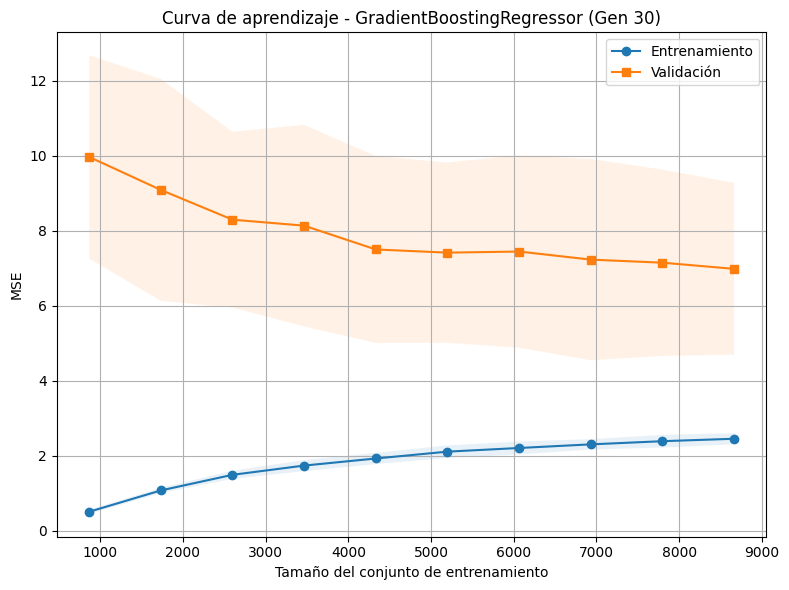

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ===============================
# CARGA DE DATOS
# ===============================
df = pd.read_csv('Par.csv')
if 'parcela' in df.columns:
    df = df.drop(columns=['parcela'])

cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)

# Asegúrate de que las columnas estén en este mismo orden
columns = [
    "Flujo de semilla(ksds/s)", "Saltos(%)", "Dobles(%)", "Pob. plantas(ksds/ha)",
    "Prop. meta(ksds/ha)", "Cant. prod.", "% densidad(%)", "Humedad(%)",
    "Temp. grano(°C)", "Ca", "Ca_Mg", "Clay", "K", "Leak", "Na", "P", "Sand",
    "Silt", "Zn", "GNDVI", "NDMI", "SAVI", "Cal sing_Bueno", "Cal sing_Doble",
    "Rate Qual_Bajo Objetivo", "Rate Qual_Bien"
]

target_col = '(seco)Masa de rend.(tonne/ha)'  # Cambia esto si tu variable objetivo tiene otro nombre

# ===============================
# TRANSFORMACIONES SEGÚN LA GENERACIÓN 30
# ===============================
df_trans = pd.DataFrame()

for col in columns:
    if col == "Flujo de semilla(ksds/s)":
        df_trans[col] = np.log1p(df[col])
    elif col == "Saltos(%)":
        df_trans[col] = df[col] ** 2
    elif col == "Dobles(%)":
        df_trans[col] = np.sqrt(df[col])
    elif col == "Pob. plantas(ksds/ha)":
        df_trans[col] = np.log1p(df[col])
    elif col == "Prop. meta(ksds/ha)":
        df_trans[col] = 1 / (df[col] + 1)
    elif col == "Cant. prod.":
        df_trans[col] = np.sqrt(df[col])
    elif col == "% densidad(%)":
        df_trans[col] = np.log1p(df[col])
    elif col == "Humedad(%)":
        df_trans[col] = df[col]
    elif col == "Temp. grano(°C)":
        scaler = MinMaxScaler()
        df_trans[col] = scaler.fit_transform(df[[col]])
    elif col in ["Ca", "Ca_Mg", "Clay", "Zn", "Silt"]:
        df_trans[col] = np.log1p(df[col])
    elif col == "K" or col == "SAVI":
        df_trans[col] = StandardScaler().fit_transform(df[[col]])
    elif col == "Leak" or col == "NDMI" or col == "P":
        df_trans[col] = df[col]
    elif col == "Na" or col == "Sand" or col == "GNDVI":
        df_trans[col] = df[col] ** 2
    elif col == "Cal sing_Bueno":
        df_trans[col] = df[col]  # Unknown -> sin cambio
    elif col == "Cal sing_Doble":
        df_trans[col] = np.sqrt(df[col])
    elif col == "Rate Qual_Bajo Objetivo":
        df_trans[col] = np.log1p(df[col])
    elif col == "Rate Qual_Bien":
        df_trans[col] = np.sqrt(df[col])
    else:
        df_trans[col] = df[col]

# ===============================
# SEPARACIÓN DE DATOS
# ===============================
X = df_trans.values
y = df[target_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# MODELO OBTENIDO DEL GENÉTICO
# ===============================
model = HistGradientBoostingRegressor(
    max_depth=3,
    learning_rate=0.13712329969970505,
    max_iter=800,  # valor razonable por defecto
    random_state=42
)

model.fit(X_train, y_train)

# ===============================
# EVALUACIÓN
# ===============================
# Predicciones en entrenamiento
y_train_pred = model.predict(X_train)
# Predicciones en prueba
y_test_pred = model.predict(X_test)

# Métricas
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Resultados del modelo:")
print(" - Conjunto de entrenamiento:")
print(f"    MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}")
print(" - Conjunto de prueba:")
print(f"    MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}")


# ===============================
# CURVA DE APRENDIZAJE
# ===============================
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring="neg_mean_squared_error", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

# Cambiar signo para obtener MSE positivo
train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', marker='o')
plt.plot(train_sizes, test_mean, label='Validación', marker='s')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje - GradientBoostingRegressor (Gen 30)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# MSE: 2.6159, RMSE: 1.6174, MAE: 1.2413, R²: 0.8558

In [11]:
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===============================
# ELIMINAR CLASES EXISTENTES
# ===============================
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

# ===============================
# CARGA DE DATOS
# ===============================
df = pd.read_csv('Par.csv')
if 'parcela' in df.columns:
    df = df.drop(columns=['parcela'])

cat_cols = ['Cal sing', 'Rate Qual']
df = pd.get_dummies(df, columns=cat_cols)

# Asegúrate de que las columnas estén en este mismo orden
columns = [
    "Flujo de semilla(ksds/s)", "Saltos(%)", "Dobles(%)", "Pob. plantas(ksds/ha)",
    "Prop. meta(ksds/ha)", "Cant. prod.", "% densidad(%)", "Humedad(%)",
    "Temp. grano(°C)", "Ca", "Ca_Mg", "Clay", "K", "Leak", "Na", "P", "Sand",
    "Silt", "Zn", "GNDVI", "NDMI", "SAVI", "Cal sing_Bueno", "Cal sing_Doble",
    "Rate Qual_Bajo Objetivo", "Rate Qual_Bien"
]

target_col = '(seco)Masa de rend.(tonne/ha)'  # Cambia esto si tu variable objetivo tiene otro nombre

# ===============================
# TRANSFORMACIONES SEGÚN LA GENERACIÓN 30
# ===============================
df_trans = pd.DataFrame()

for col in columns:
    if col == "Flujo de semilla(ksds/s)":
        df_trans[col] = np.log1p(df[col])
    elif col == "Saltos(%)":
        df_trans[col] = df[col] ** 2
    elif col == "Dobles(%)":
        df_trans[col] = np.sqrt(df[col])
    elif col == "Pob. plantas(ksds/ha)":
        df_trans[col] = np.log1p(df[col])
    elif col == "Prop. meta(ksds/ha)":
        df_trans[col] = 1 / (df[col] + 1)
    elif col == "Cant. prod.":
        df_trans[col] = np.sqrt(df[col])
    elif col == "% densidad(%)":
        df_trans[col] = np.log1p(df[col])
    elif col == "Humedad(%)":
        df_trans[col] = df[col]
    elif col == "Temp. grano(°C)":
        scaler = MinMaxScaler()
        df_trans[col] = scaler.fit_transform(df[[col]])
    elif col in ["Ca", "Ca_Mg", "Clay", "Zn", "Silt"]:
        df_trans[col] = np.log1p(df[col])
    elif col == "K" or col == "SAVI":
        df_trans[col] = StandardScaler().fit_transform(df[[col]])
    elif col == "Leak" or col == "NDMI" or col == "P":
        df_trans[col] = df[col]
    elif col == "Na" or col == "Sand" or col == "GNDVI":
        df_trans[col] = df[col] ** 2
    elif col == "Cal sing_Bueno":
        df_trans[col] = df[col]  # Unknown -> sin cambio
    elif col == "Cal sing_Doble":
        df_trans[col] = np.sqrt(df[col])
    elif col == "Rate Qual_Bajo Objetivo":
        df_trans[col] = np.log1p(df[col])
    elif col == "Rate Qual_Bien":
        df_trans[col] = np.sqrt(df[col])
    else:
        df_trans[col] = df[col]

# ===============================
# SEPARAR DATOS (ya transformados)
# ===============================
X = df_trans.values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# CONFIGURACIÓN DE DEAP - MODIFICADO PARA AG SIMPLE
# ===============================
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # AHORA: función compuesta única
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Rangos de hiperparámetros (solo lr y max_iter, max_depth fijo en 3)
toolbox.register("attr_max_iter", random.randint, 100, 1000)
toolbox.register("attr_lr", random.uniform, 0.01, 0.5)

# Crear individuos y población (solo 2 parámetros)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_max_iter, toolbox.attr_lr), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ===============================
# FUNCIÓN DE EVALUACIÓN COMPUESTA - MODIFICADA
# ===============================
def eval_compuesta(individual):
    max_iter, lr = individual
    max_depth = 3  # FIJO en 3 como solicitaste

    # Asegurar que los parámetros estén en los rangos correctos
    max_iter = int(round(max(100, min(1000, max_iter))))
    lr = max(0.01, min(0.5, lr))

    model = HistGradientBoostingRegressor(
        max_depth=max_depth,
        max_iter=max_iter,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Métricas
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # FUNCIÓN COMPUESTA: Combinamos MSE test y R² test
    # Penalizamos si la diferencia entre train y test es muy grande
    diff_penalty = abs(mse_train - mse_test) * 0.1
    r2_penalty = (1 - r2_test) * 0.5  # Penalización por bajo R²

    # Función compuesta final (queremos minimizar esto)
    compuesta = mse_test + diff_penalty + r2_penalty

    return (compuesta,)

toolbox.register("evaluate", eval_compuesta)
toolbox.register("mate", tools.cxBlend, alpha=0.5)

# ===============================
# MUTACIÓN SEGURA
# ===============================
def mutate_safe(individual, indpb=0.2):
    # max_iter
    if random.random() < indpb:
        individual[0] = individual[0] + random.randint(-50, 50)
    individual[0] = max(100, min(1000, individual[0]))

    # learning_rate
    if random.random() < indpb:
        individual[1] = individual[1] + random.uniform(-0.05, 0.05)
    individual[1] = max(0.01, min(0.5, individual[1]))

    return individual,

toolbox.register("mutate", mutate_safe, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)  # SELECCIÓN SIMPLE

# ===============================
# FUNCIÓN PARA REPARAR INDIVIDUOS
# ===============================
def check_bounds(individual):
    individual[0] = max(100, min(1000, individual[0]))
    individual[1] = max(0.01, min(0.5, individual[1]))
    return individual

# ===============================
# EJECUCIÓN DEL AG SIMPLE
# ===============================
population = toolbox.population(n=50)  # Población más grande para AG simple

# Evaluar población inicial
invalid_ind = [ind for ind in population if not ind.fitness.valid]
fits = toolbox.map(toolbox.evaluate, invalid_ind)
for fit, ind in zip(fits, invalid_ind):
    ind.fitness.values = fit

NGEN = 30  # Menas generaciones para AG simple
CXPB = 0.7  # Mayor probabilidad de cruza
MUTPB = 0.2  # Menor probabilidad de mutación

print("Iniciando algoritmo genético simple...")
print("Optimizando: max_iter [100-1000], lr [0.01-0.5], max_depth=3 (fijo)")

for gen in range(NGEN):
    # Selección
    offspring = toolbox.select(population, len(population))

    # Clonar
    offspring = list(map(toolbox.clone, offspring))

    # Cruza
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Mutación
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Reparar y evaluar nuevos individuos
    for ind in offspring:
        ind = check_bounds(ind)
        if not ind.fitness.valid:
            ind.fitness.values = toolbox.evaluate(ind)

    # Reemplazar población
    population[:] = offspring

    # Mejor individuo de la generación
    best = tools.selBest(population, 1)[0]

    # Entrenar modelo para imprimir métricas completas
    model_best = HistGradientBoostingRegressor(
        max_depth=3,  # FIJO
        max_iter=int(best[0]),
        learning_rate=best[1],
        random_state=42
    )
    model_best.fit(X_train, y_train)

    y_train_pred = model_best.predict(X_train)
    y_test_pred = model_best.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    compuesta = best.fitness.values[0]

    print(f"\nGen {gen+1}: Mejor individuo")
    print(f"max_depth=3, max_iter={int(best[0])}, lr={best[1]:.4f}")
    print(f"Función compuesta: {compuesta:.4f}")
    print(f"MSE Train={mse_train:.4f}, RMSE Train={rmse_train:.4f}, MAE Train={mae_train:.4f}, R² Train={r2_train:.4f}")
    print(f"MSE Test={mse_test:.4f}, RMSE Test={rmse_test:.4f}, MAE Test={mae_test:.4f}, R² Test={r2_test:.4f}")
    print(f"Diferencia MSE={abs(mse_train-mse_test):.4f}")

# ===============================
# MEJOR MODELO FINAL
# ===============================
best_ind = tools.selBest(population, 1)[0]
final_model = HistGradientBoostingRegressor(
    max_depth=3,  # FIJO
    max_iter=int(best_ind[0]),
    learning_rate=best_ind[1],
    random_state=42
)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n" + "="*50)
print("MEJOR MODELO FINAL:")
print("="*50)
print(f"Parámetros optimizados:")
print(f"max_depth=3 (fijo)")
print(f"max_iter={int(best_ind[0])}")
print(f"learning_rate={best_ind[1]:.4f}")
print(f"\nMétricas de entrenamiento:")
print(f"MSE Train={mse_train:.4f}, RMSE Train={rmse_train:.4f}")
print(f"MAE Train={mae_train:.4f}, R² Train={r2_train:.4f}")
print(f"\nMétricas de test:")
print(f"MSE Test={mse_test:.4f}, RMSE Test={rmse_test:.4f}")
print(f"MAE Test={mae_test:.4f}, R² Test={r2_test:.4f}")
print(f"\nDiferencia MSE Train-Test: {abs(mse_train-mse_test):.4f}")
print(f"Función compuesta final: {best_ind.fitness.values[0]:.4f}")

Iniciando algoritmo genético simple...
Optimizando: max_iter [100-1000], lr [0.01-0.5], max_depth=3 (fijo)

Gen 1: Mejor individuo
max_depth=3, max_iter=919, lr=0.3177
Función compuesta: 4.0863
MSE Train=1.3900, RMSE Train=1.1790, MAE Train=0.8934, R² Train=0.9234
MSE Test=3.7500, RMSE Test=1.9365, MAE Test=1.4781, R² Test=0.7966
Diferencia MSE=2.3600

Gen 2: Mejor individuo
max_depth=3, max_iter=847, lr=0.2713
Función compuesta: 4.0693
MSE Train=1.6513, RMSE Train=1.2850, MAE Train=0.9732, R² Train=0.9090
MSE Test=3.7591, RMSE Test=1.9388, MAE Test=1.4778, R² Test=0.7961
Diferencia MSE=2.1078

Gen 3: Mejor individuo
max_depth=3, max_iter=975, lr=0.2534
Función compuesta: 4.0688
MSE Train=1.5745, RMSE Train=1.2548, MAE Train=0.9509, R² Train=0.9132
MSE Test=3.7496, RMSE Test=1.9364, MAE Test=1.4741, R² Test=0.7966
Diferencia MSE=2.1751

Gen 4: Mejor individuo
max_depth=3, max_iter=975, lr=0.2534
Función compuesta: 4.0688
MSE Train=1.5745, RMSE Train=1.2548, MAE Train=0.9509, R² Train=0